In [ ]:
!pip install transformers

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

from transformers import BertTokenizer
from transformers import pipeline

from transformers import logging
logging.set_verbosity_error()

Based on [kaggle notebook](https://www.kaggle.com/code/vilgus/prompt-based-learning-0-shot-text-classification/notebook)

This is an example of how to use a Prompt-based Learning with a BERT model from HuggingFace to perform Zero-Shot Text Classification of news articles from the AG News dataset.

If you run at Google Colab, please remember to upload the `train.csv` and `test.csv` files.

In [3]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
topics = {1: 'world',
          2: 'sports',
          3: 'business',
          4: 'science'} # Originally "Sci/Tech"

Get a sample news article.

In [9]:
sample = train_data.sample()

topic = topics[sample['Class Index'].item()]
title = sample['Title'].item()
description = sample['Description'].item()

news_article = title + ". " + description

Function for printing the news article.

In [5]:
from IPython.display import Markdown, display

def print_news_article(topic, news_article):
    display(Markdown('**News topic: "{}":**'.format(topic) + '<br>' \
       + news_article))

Function for plotting the output results.

In [6]:
def plot_output(output, prompts):
    sns.set_theme(style="darkgrid")

    fig = plt.figure(figsize=(14,4))
    n_rows = math.ceil(len(prompts) / 3)
    n_cols = 3 if len(prompts) > 3 else len(prompts)
    counter = 1

    for i, (pt, o) in enumerate(zip(prompts, output)):
        df = pd.DataFrame(o)
        ax = plt.subplot(n_rows, n_cols, counter)
        plt.title(pt)
        plt.xlabel('News topic')
        sbp = sns.barplot(x="token_str", y="score", data=df, ax=ax, palette='Blues', order=topics.values())
        sbp.set(xlabel=None)
        sbp.set(ylabel=None)
        counter += 1

    sns.despine(bottom=True, left=True, fig=fig)

Do the classification.

**News topic: "business":**<br>Blue Chips End Lower, Wal-Mart Weighs.  NEW YORK (Reuters) - U.S. blue chips ended lower on Monday  after a disappointing sales forecast from the world's biggest  retailer, Wal-Mart Stores Inc. &lt;A HREF="http://www.investor.reuters.com/FullQuote.aspx?ticker=WMT.N target=/stocks/quickinfo/fullquote"&gt;WMT.N&lt;/A&gt;, overshadowed a two-day  pullback in oil prices.

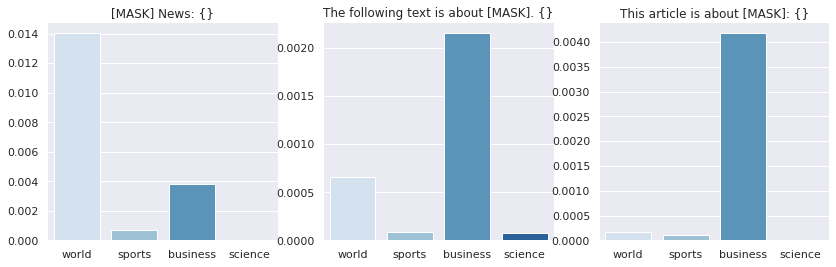

In [10]:
prompt_templates = [
    '[MASK] News: {}',
    'The following text is about [MASK]. {}',
    'This article is about [MASK]: {}'
]
class_labels = ['world', 'sports', 'business', 'science']

prompts = [[pt.format(news_article)] for pt in prompt_templates]

#create pipeline
unmasker = pipeline('fill-mask', model='bert-base-uncased', targets=class_labels)
output = unmasker(prompts)

print_news_article(topic, news_article)
plot_output(output, prompt_templates)